In [1]:
# Emily Hoang
# 4/5/2022 3-state nearest neighbor cellular automata

from numpy import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def page_printer(data, start=0, screen_lines=0, pager_cmd=None):
    if isinstance(data, dict):
        data = data['text/plain']
    print(data)

import IPython.core.page
IPython.core.page.page = page_printer

## Non-spaghetti (using functions and a class)

In [3]:
class methods:

    def num_to_rule(num):
        '''
        Converts a number between (and including) 0 and 19682 into a cellular automata rule in ternary basis.
        Returns the rule in the form of a list with padding.
        '''
        rule = []
        if num > 19682 or num < 0:
            raise ValueError("Error, number too large (greater than 19682) or negative")
        else:
            while num > 0:
                rule.append(int(num%3))
                num = floor(num/3)
            while len(rule) < 9: # Padding
                rule.append(0)
        return rule[::-1]
    
    def lookup_table(rule_num):
        '''
        Takes a number, converting it into a cellular automata rule, and creates a table.
        Each possible neighborhood configuration corresponds to a number based on the rule.
        '''
        rule = methods.num_to_rule(rule_num)
        neighborhoods = [[2,2],[2,1],[2,0],[1,2],[1,1],[1,0],[0,2],[0,1],[0,0]]
        table = []

        for i in range(len(rule)):
            key = neighborhoods[i]
            val = rule[i]
            table.append([key,val])
        return table

    def next_row(init,rule_num):
        '''
        Takes an initial row and a rule number. Applies the rule to the initial row and returns the next row using the
        neighborhood table. Neighborhood: cell above + cell above and to the left
        x x o
        o x o
        '''
        init_row = list(map(int, str(init)))
        table = methods.lookup_table(rule_num)
        init_neighborhood = []
        for i in range(len(init_row)):
            init_neighborhood.append([init_row[i-1],init_row[i]])

        new_row = []
        for i in init_neighborhood:
            for j in table:
                if i == j[0]:
                    new_row.append(j[1])
        return new_row
    
    def cell_auto_creator(init,rule_num,num_rows):
        '''
        Iterates the next_row function starting from an initial row. Returns a cell by iterating the input rule
        depending on the number of rows specified.
        '''
        init_row = list(map(int, str(init)))
        cell = [init_row]
        count = 1
        while count < num_rows:
            cell.append(methods.next_row(init,rule_num))

            strings = [str(i) for i in methods.next_row(init,rule_num)]
            init = "".join(strings)

            init_row = methods.next_row(init,rule_num) # Updates the new row to be the row iterated on
            count += 1
        return cell

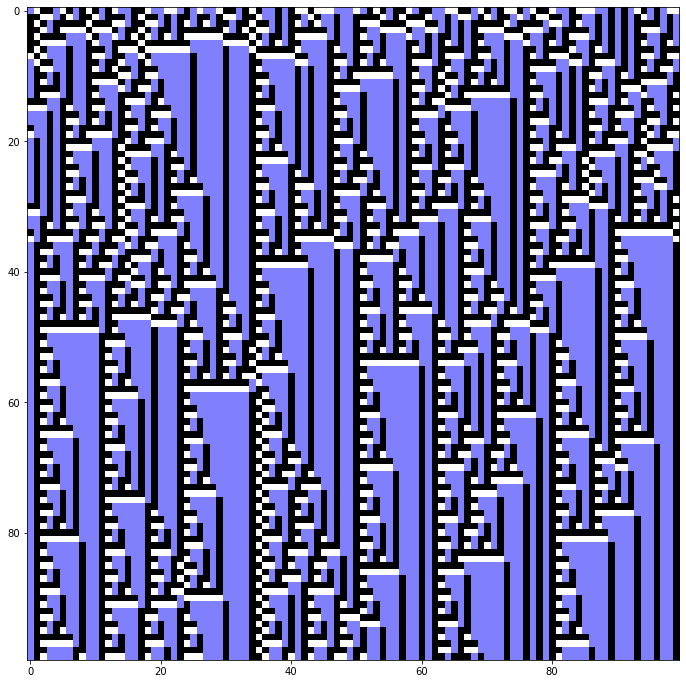

In [4]:
# init = 221200110
init = 1200120102010211002112210121120010201101022022211121020100210011220012010220120021102221101012010122
rule = 8105

spacetime_field = methods.cell_auto_creator(init,rule,100)

plt.figure(figsize=(12,12))
plt.imshow(spacetime_field, cmap=plt.cm.gist_stern, interpolation='nearest')
plt.show()

## Spaghetti (not using functions and classes)

In [5]:
num = 8105
rule = []
while num > 0: # Converts number to rule (list)
    rule.append(int(num%3))
    num = floor(num/3)
while len(rule) < 9:
    rule.append(0)
rule = rule[::-1]

In [6]:
neighborhoods = [[2,2],[2,1],[2,0],[1,2],[1,1],[1,0],[0,2],[0,1],[0,0]]
table = []

for i in range(len(rule)): # Creates a table with neighbors and corresponding outputs
    key = neighborhoods[i]
    val = rule[i]
    table.append([key,val])

In [7]:
# init = 221200110
init = 1200120102010211002112210121120010201101022022211121020100210011220012010220120021102221101012010122
init_row = list(map(int, str(init)))
spacetime_field = [init_row]

count = 1
num_rows = 100

init_neighborhood = []
for i in range(len(init_row)): # Creates a list of initial neighbors
    init_neighborhood.append([init_row[i-1],init_row[i]])

while count < num_rows:
    
    new_row = []
    for i in init_neighborhood:
        for j in table:
            if i == j[0]:
                new_row.append(j[1])
    
    spacetime_field.append(new_row)
    
    init_neighborhood = []
    for i in range(len(init_row)):
        init_neighborhood.append([new_row[i-1],new_row[i]])
    
    count += 1

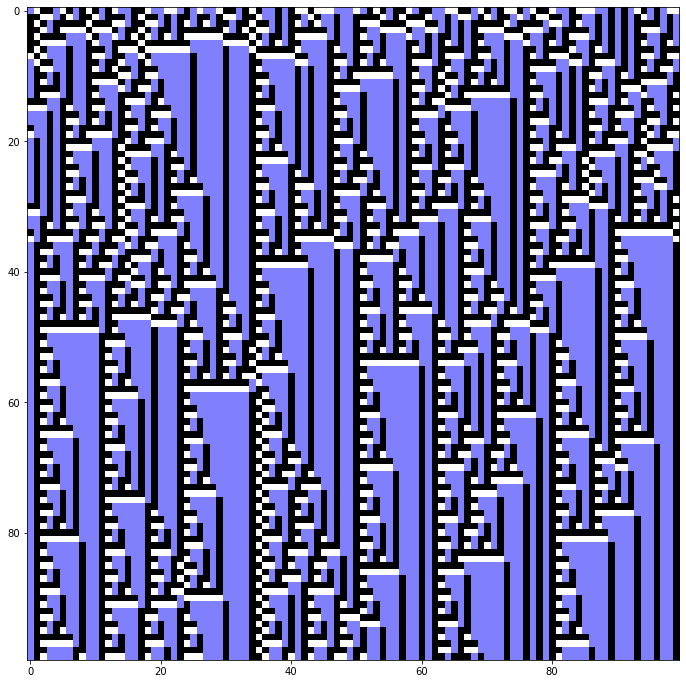

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(spacetime_field, cmap=plt.cm.gist_stern, interpolation='nearest')
plt.show()

In [10]:
!jupyter nbconvert --to script "Homework 1.ipynb"

[NbConvertApp] Converting notebook Homework 1.ipynb to script
[NbConvertApp] Writing 4778 bytes to Homework 1.py
